**this code snippet will allow you to upload data to google colab.**

This data will be available **only** in the notebook in which you run this code. Add this to the top of your notebook for Task2

In [1]:
# use this code snippet to upload the mat file to google colab 
# The dataset will be stored in the variables X and Y


import scipy.io as sio
import numpy as np
import time
import pylab as pl
import random
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline


import os.path
if not os.path.isfile('training_data.mat'):
  from google.colab import files
  uploaded = files.upload()
  
data = sio.loadmat('training_data.mat')
X = np.array(data['X'])
X = np.append(X.T, np.ones((X.shape[1],1)),axis = 1)
Y = np.array(data['Y'])

print('Training data shape:',X.shape)
print('Labels shape:', Y.shape, '\n')

Training data shape: (15468, 3)
Labels shape: (15468, 1) 



In [123]:
class Perceptron:

    # input_size: dimension of the input including bias
    def __init__(self,input_size):
      
        # we store the input size because we will need it later
        self.input_size = input_size
        
        # weights (w) in randomly initalized to be the same size as the input
        self.w0 = np.random.randn(input_size,1).reshape(input_size,1)
        self.w1 = np.random.randn(input_size,1).reshape(input_size,1)
        self.w2 = np.random.randn(input_size,1).reshape(input_size,1)
        
        # we will store our accuracy after each iteration here
        self.history0, self.history1, self.history2 = [],[],[]
        
        
        self.count = 0
        
    def train(self,X,Y0,Y1,Y2, max_epochs = 100):
        
        # we clear history each time we start training
        self.history = []
        
        number_of_samples = len(Y0)
        allConverged = False
        converged0, converged1, converged2 = False, False, False
        epochs = 0
        
        while not allConverged and epochs < max_epochs :
            
            # adaptive learning rate
            if epochs < number_of_samples:
               learnRate = 1/(epochs+1)**1.2
            else:
               learnRate = 1/number_of_samples**1.2
            
            for i in range(len(Y0)):
            
                if not converged0:
                    prediction0 = self.w0[0]*X[i][0] + self.w0[1]*X[i][1] + self.w0[2]
                    if prediction0 > 0: prediction0 = 1
                    else: prediction0 = 0

                    self.w0[0] = self.w0[0] + learnRate * (int(Y0[i]) - prediction0) * X[i][0]
                    self.w0[1] = self.w0[1] + learnRate * (int(Y0[i]) - prediction0) * X[i][1]
                    self.w0[2] = self.w0[2] + learnRate * (int(Y0[i]) - prediction0)
                
                if not converged1:
                    prediction1 = self.w1[0]*X[i][0] + self.w1[1]*X[i][1] + self.w1[2]
                    if prediction1 > 0: prediction1 = 1
                    else: prediction1 = 0

                    self.w1[0] = self.w1[0] + learnRate * (int(Y1[i]) - prediction1) * X[i][0]
                    self.w1[1] = self.w1[1] + learnRate * (int(Y1[i]) - prediction1) * X[i][1]
                    self.w1[2] = self.w1[2] + learnRate * (int(Y1[i]) - prediction1)
                
                if not converged2:
                    prediction2 = self.w2[0]*X[i][0] + self.w2[1]*X[i][1] + self.w2[2]
                    if prediction2 > 0: prediction2 = 1
                    else: prediction2 = 0

                    self.w2[0] = self.w2[0] + learnRate * (int(Y2[i]) - prediction2) * X[i][0]
                    self.w2[1] = self.w2[1] + learnRate * (int(Y2[i]) - prediction2) * X[i][1]
                    self.w2[2] = self.w2[2] + learnRate * (int(Y2[i]) - prediction2)

            # after training one epoch, we compute again the accuracy
            self.compute_train_accuracy(X,Y0,Y1,Y2)
            epochs +=1
            
            # check convergence for each
            if self.history0[-1] == 1:
                converged0 = True
            if self.history1[-1] == 1:
                converged1 = True
            if self.history2[-1] == 1:
                converged2 = True
                
            # if all converged, end while loop
            if converged0 and converged1 and converged2:
                allConverged = True
        
        if epochs == max_epochs:
            print("Qutting: Reached max iterations")
            print("Accuracy: ",self.history[-1])
          
        if allConverged:
            print("Qutting: Converged after ", epochs, " epochs")
            print("Accuracy: ", self.history0[-1], self.history1[-1], self.history2[-2])
        
        self.plot_training_history()
        self.plot_accuracy(epochs)
          
    def plot_accuracy(self, epochs):
        x = np.arange(0, epochs)
        pl.xlabel('Epoch')
        pl.ylabel('Accuracy')
        pl.plot(x, self.history0, 'r', x, self.history1, 'g', x, self.history2, 'b')
        
    def draw(self,X):
        pl.close()       
        x = np.linspace(-1,1)
        
        pl.xlim((-1,1))
        pl.ylim((-1,1))
         
        global Y0, Y1, Y2
        #C = A[B.reshape(B.shape[0]) == 0]
        sqY0 = Y0.squeeze()
        sqY1 = Y1.squeeze()
        sqY2 = Y2.squeeze()
        P0 = X[sqY0 == 0,:2]
        P1 = X[sqY1 == 1,:2]
        P2 = X[sqY2 == 1,:2]
        pl.plot(P0[:,0],P0[:,1],'ro',P1[:,0],P1[:,1],'go',P2[:,0],P2[:,1],'bo')
        
        a0 = self.w0[0]
        b0 = self.w0[1]
        c0 = self.w0[2]
        
        a1 = self.w1[0]
        b1 = self.w1[1]
        c1 = self.w1[2]
        
        a2 = self.w2[0]
        b2 = self.w2[1]
        c2 = self.w2[2]
        
        pl.plot(x, -a0/b0*x - c0/b0, 'r', label = 'Class 0')
        pl.plot(x, -a1/b1*x - c1/b1, 'g', label = 'Class 1')
        pl.plot(x, -a2/b2*x - c2/b2, 'b', label = 'Class 2')
        
        pl.axis('tight')
        pl.legend()
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        
    
    # This computes the accuracy of our current estimate
    def compute_train_accuracy(self,X,Y0,Y1,Y2):
        out0 = np.matmul(X,self.w0)
        out1 = np.matmul(X,self.w1)
        out2 = np.matmul(X,self.w2)
        Y_bar0 = (out0 >= 0)
        Y_bar1 = (out1 >= 0)
        Y_bar2 = (out2 >= 0)
        accuracy0 = np.sum(Y0==Y_bar0)/np.float(Y_bar0.shape[0])
        accuracy1 = np.sum(Y1==Y_bar1)/np.float(Y_bar1.shape[0])
        accuracy2 = np.sum(Y2==Y_bar2)/np.float(Y_bar2.shape[0])
        self.history0.append(accuracy0)
        self.history1.append(accuracy1)
        self.history2.append(accuracy2)
        print("Accuracy : ", (accuracy0), (accuracy1), (accuracy2))
        self.draw(X)
        
        
    # Once training is done, we can plot the accuracy over time 
    def plot_training_history(self):
      plt.ylim((-1,1.01))
      plt.plot(np.arange(len(self.history))+1, np.array(self.history),'-x')
      plt.show()

In [130]:
max_number_of_epochs = 100

Y0 = np.copy(Y)
Y1 = np.copy(Y)
Y2 = np.copy(Y)

Y0[Y == 2] = 1
Y1[Y == 2] = 0
Y2[Y == 1] = 0
Y2[Y == 2] = 1

p = Perceptron(3)

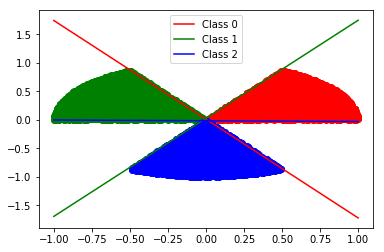

Qutting: Converged after  14  epochs
Accuracy:  1.0 1.0 1.0


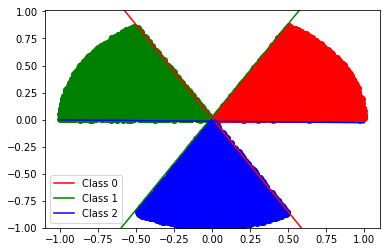

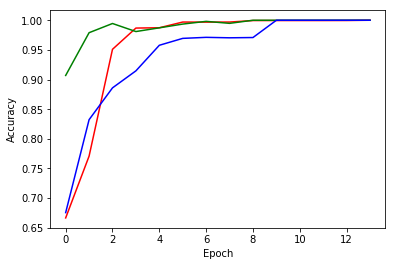

In [131]:
p.train(X,Y0,Y1,Y2,max_number_of_epochs)